<a href="https://colab.research.google.com/github/Yuji-ONUKI/GCI2020_Winter/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing data...')
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
record = pd.read_csv("/content/drive/MyDrive/Record.csv")
client = pd.read_csv("/content/drive/MyDrive/Client.csv")

Importing data...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
record.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months'],
      dtype='object')

In [212]:
record['rev_Mean'].describe()

count    99643.000000
mean        58.719985
std         46.291677
min         -6.167500
25%         33.260000
50%         48.195000
75%         70.750000
max       3843.262500
Name: rev_Mean, dtype: float64

In [ ]:
#record.describe()

In [ ]:
for col in record.columns:
  if(record[col].min()<0):
    print(col)

rev_Mean
totmrc_Mean
change_mou
change_rev


In [ ]:
cols_min = ['rev_Mean',
'totmrc_Mean',
'change_mou',
'change_rev']

In [ ]:
#for col in cols_min:
#  print(col,'\t',record.loc[record[col]<0,col].count())

rev_Mean:
Mean monthly revenue (charge amount)

totmrc_Mean:
Mean total monthly recurring charge 定期的な料金

change_mou:
Percentage change in monthly minutes of use vs previous three month average

change_rev:
Percentage change in monthly revenue vs previous three month average

In [ ]:
#record.loc[record['rev_Mean']<0]

10万レコード同士なので両者対応していると考える。これ違うかも！

In [215]:
#df=pd.concat([client,record],axis=1)
#org=df
df=record

In [217]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months'],
      dtype='object')

In [257]:
for col in df.columns:
  if len(df[col].unique()) > 1000:
      print(col, '\t',len(df[col].unique()))

# 'churn'解約をターゲットとする。

In [258]:
cols=[
'rev_Mean',
'ovrrev_Mean',
'change_rev',
'mou_cvce_Mean',
'mou_rvce_Mean',
'mouowylisv_Mean',
'mouiwylisv_Mean',
'mou_peav_Mean',
'mou_opkv_Mean']

In [259]:
for col in cols:
  df[cols]=round(df[cols])

In [260]:
cols=[
'mou_Mean',
'totmrc_Mean',
'ovrmou_Mean',
'vceovr_Mean',
'roam_Mean',
'change_mou',
'plcd_vce_Mean',
'recv_vce_Mean',
'comp_vce_Mean',
'cc_mou_Mean',
'inonemin_Mean',
'mou_cdat_Mean',
'peak_vce_Mean',
'mou_pead_Mean',
'opk_vce_Mean',
'mou_opkd_Mean',
'attempt_Mean',
'complete_Mean']

In [261]:
for col in cols:
  df[col]=round(df[col])

In [ ]:
#for col in df.columns:
#  if len(df[col].unique()) > 100:
#      print(col, '\t',len(df[col].unique()))

In [ ]:
#df.drop(['Customer_ID'],axis=1,inplace=True)

In [262]:
df['callwait_Mean'].dtype

dtype('float64')

In [263]:
cols = [col for col in df.columns if df[col].dtype == 'object']

In [264]:
#for col in cols:
#  print(col,'\t',len(df[col].unique()))

In [ ]:
#df=pd.get_dummies(df,columns=cols)

In [265]:
import gc
gc.collect()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)

scaler.transform(df)

array([[0.00000000e+00, 1.80180180e-02, 1.13636364e-01, ...,
        1.56739812e-03, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 3.93120393e-02, 1.59090909e-01, ...,
        2.66457680e-02, 0.00000000e+00, 9.09090909e-01],
       [0.00000000e+00, 8.19000819e-04, 1.13636364e-01, ...,
        0.00000000e+00, 1.00000000e+00, 9.45454545e-01],
       ...,
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 4.54545455e-01],
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 3.45454545e-01],
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 1.00000000e+00, 3.45454545e-01]])

In [229]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,0.0,22.0,2.0,0.2475,0.0,0.0,0.0,0.0,0.0,-16.0,...,0.0,0.0,0.0,1.333333,5.0,4.0,0.0,0.333333,1,61
1,0.0,48.0,4.0,0.2475,2.0,0.0,1.0,0.0,0.0,53.0,...,0.0,0.0,0.0,9.333333,26.0,19.0,0.0,5.666667,0,56
2,0.0,1.0,2.0,0.0000,0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.333333,1.0,1.0,0.0,0.000000,1,58
3,0.0,1.0,4.0,0.0000,0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,60
4,0.0,57.0,7.0,0.0000,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,10.333333,22.0,14.0,0.0,0.000000,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.000000,5.0,5.0,0.0,0.000000,1,25
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4.000000,7.0,5.0,0.0,0.000000,0,27
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,31
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,19.333333,55.0,42.0,0.0,0.000000,0,25


In [266]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [267]:
X = df.drop('churn',axis=1) 
y = df['churn'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [268]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.622971
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.624785
[3]	valid_0's auc: 0.627015
[4]	valid_0's auc: 0.627768
[5]	valid_0's auc: 0.627627
[6]	valid_0's auc: 0.631479
[7]	valid_0's auc: 0.632001
[8]	valid_0's auc: 0.632604
[9]	valid_0's auc: 0.632963
[10]	valid_0's auc: 0.633394
[11]	valid_0's auc: 0.63391
[12]	valid_0's auc: 0.634267
[13]	valid_0's auc: 0.635221
[14]	valid_0's auc: 0.63588
[15]	valid_0's auc: 0.635919
[16]	valid_0's auc: 0.636462
[17]	valid_0's auc: 0.636821
[18]	valid_0's auc: 0.637545
[19]	valid_0's auc: 0.637736
[20]	valid_0's auc: 0.637848
[21]	valid_0's auc: 0.638088
[22]	valid_0's auc: 0.638514
[23]	valid_0's auc: 0.638708
[24]	valid_0's auc: 0.639015
[25]	valid_0's auc: 0.639887
[26]	valid_0's auc: 0.640039
[27]	valid_0's auc: 0.640578
[28]	valid_0's auc: 0.640685
[29]	valid_0's auc: 0.641236
[30]	valid_0's auc: 0.641687
[31]	valid_0's auc: 0.641672
[32]	valid_0's auc: 0.641953
[33]	valid_0's auc: 0

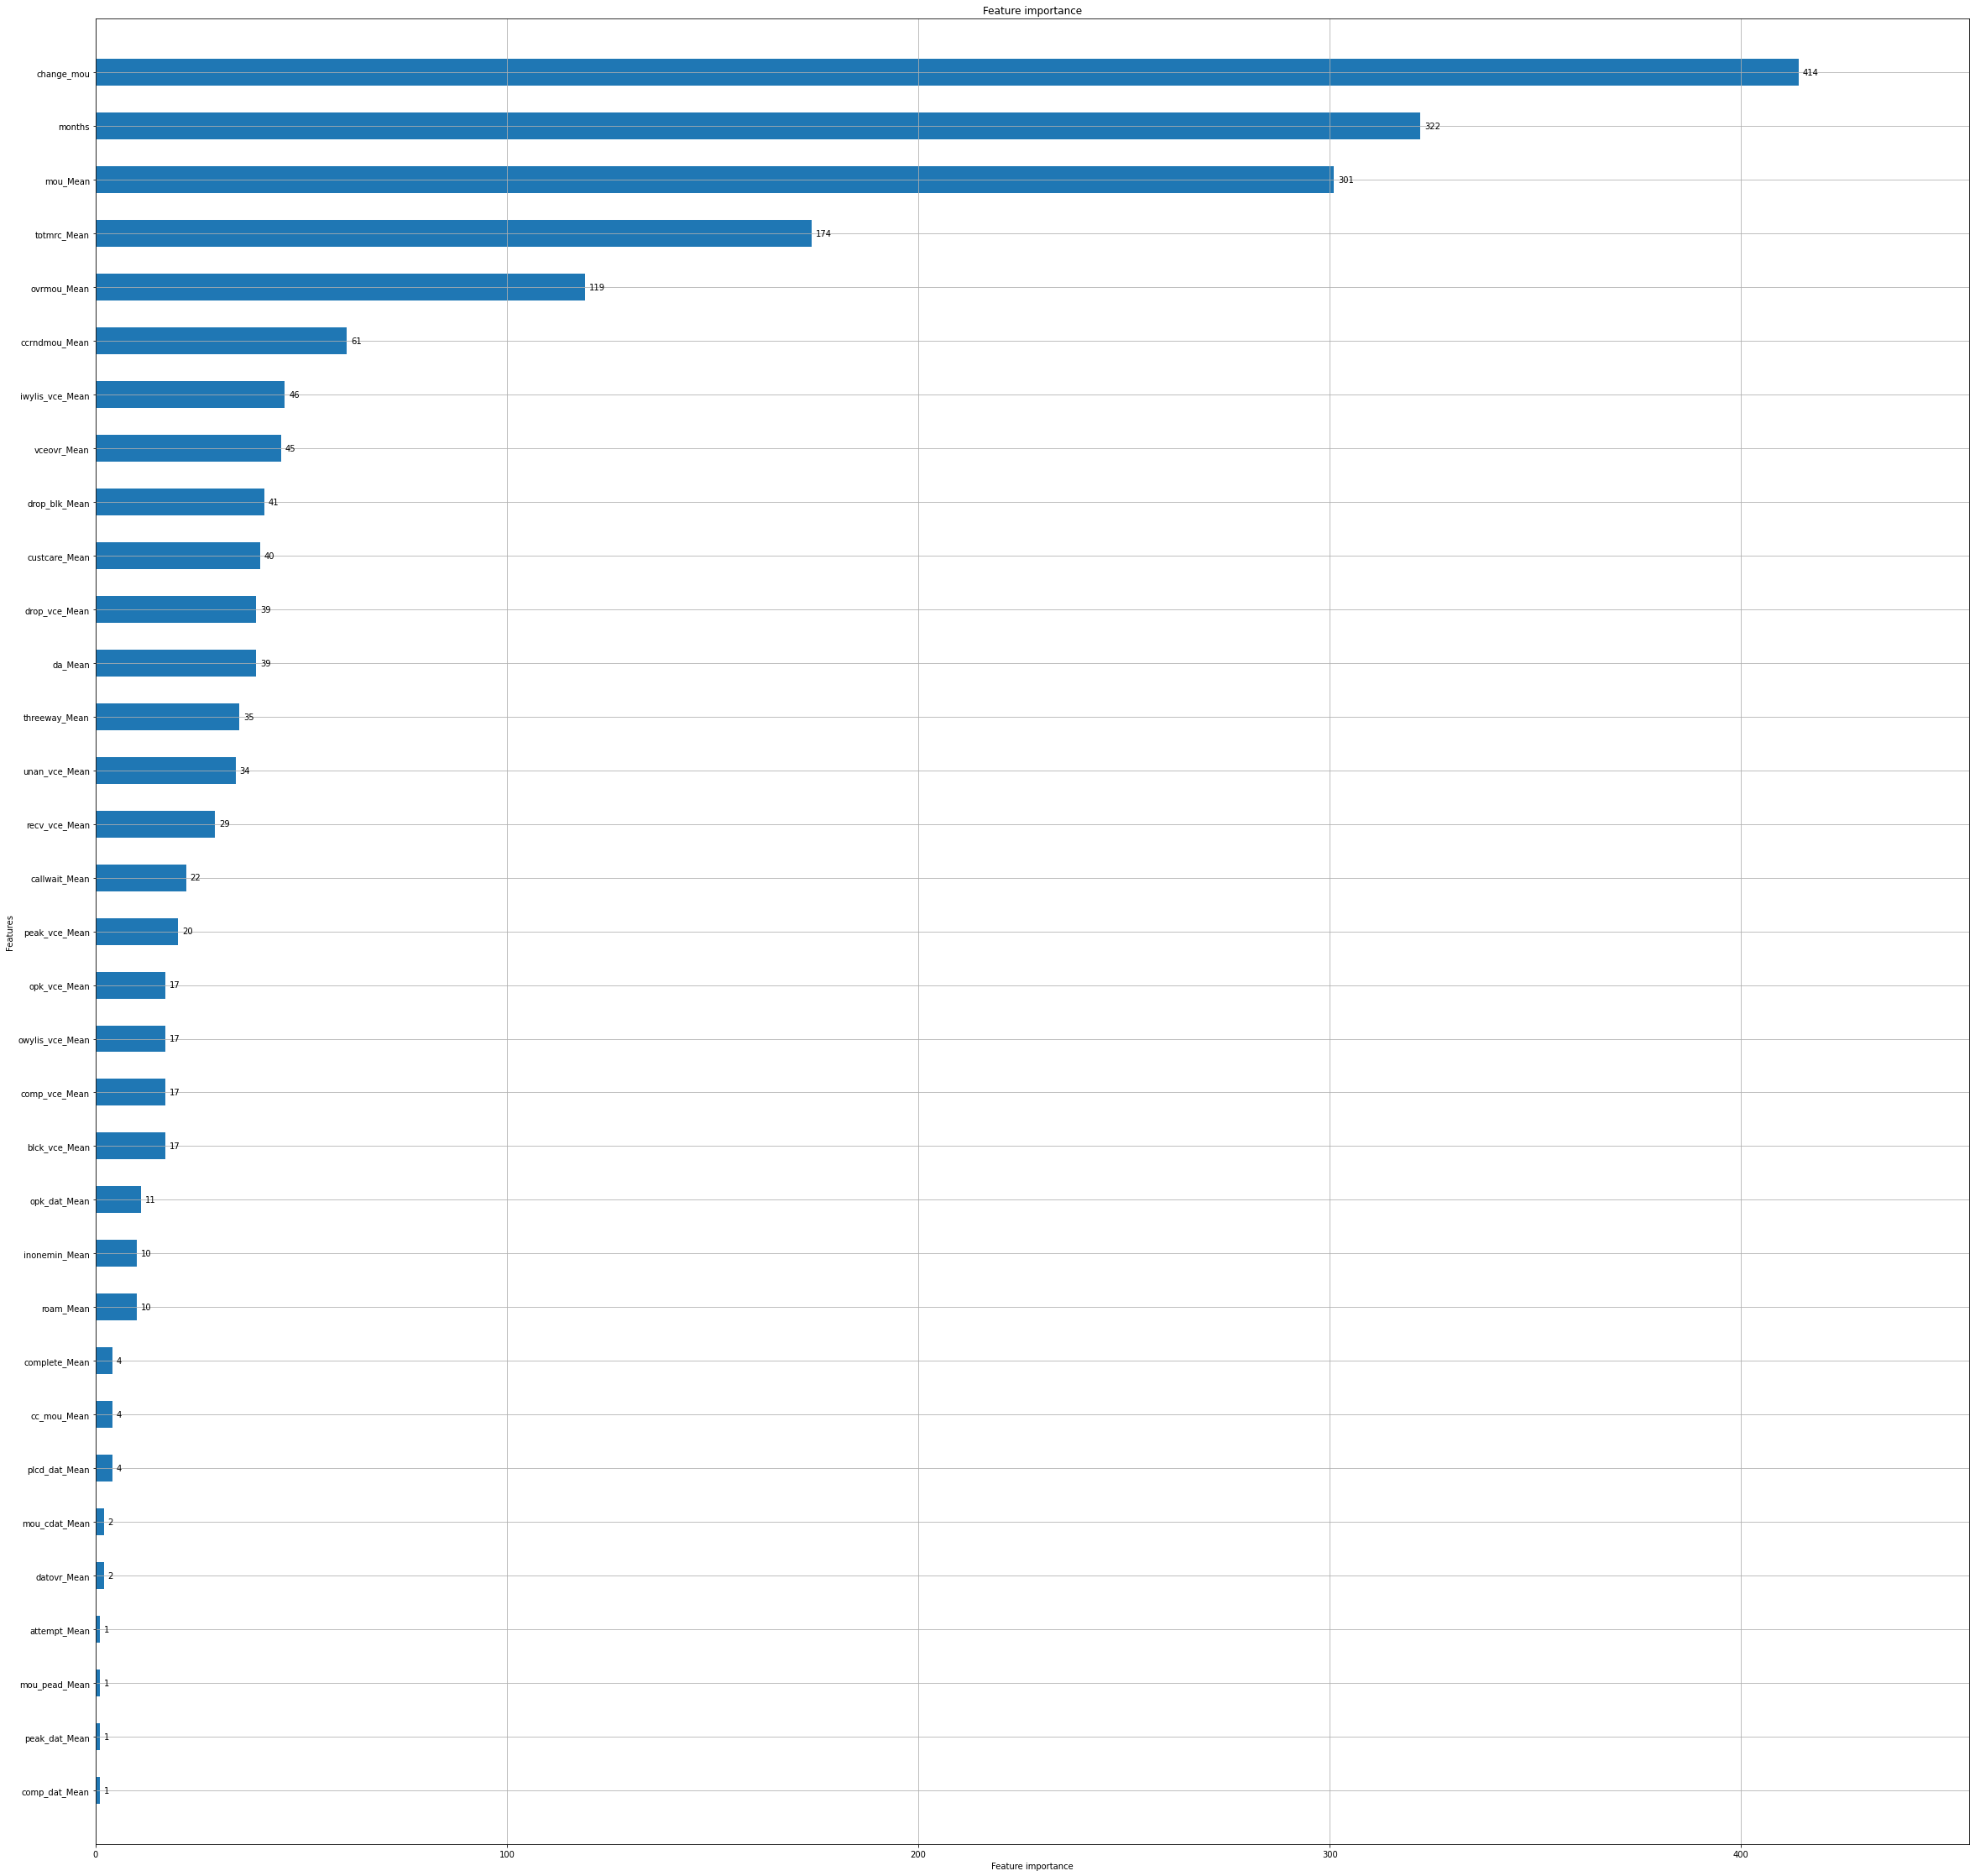

In [269]:
lgb.plot_importance(model, height=0.5, figsize=(40,40))

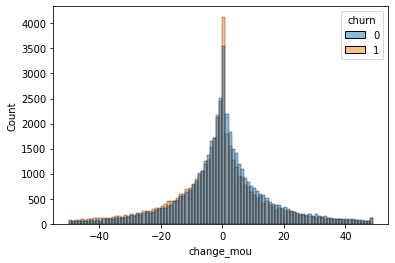

In [270]:
sns.histplot(data=df, x="change_mou",bins=range(-50,50,1),hue='churn')

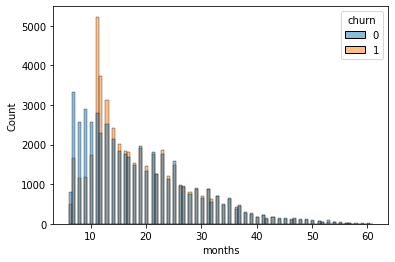

In [271]:
sns.histplot(data=df, x="months",hue='churn')

# 12か月目に離脱している顧客が非常に多い

In [272]:
X = df.loc[df['months']==12]
X = X.drop('churn',axis=1)
y = df.loc[df['months']==12,'churn'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [273]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[1]	valid_0's auc: 0.548285
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.552116
[3]	valid_0's auc: 0.55235
[4]	valid_0's auc: 0.552888
[5]	valid_0's auc: 0.553364
[6]	valid_0's auc: 0.555547
[7]	valid_0's auc: 0.554401
[8]	valid_0's auc: 0.559109
[9]	valid_0's auc: 0.555906
[10]	valid_0's auc: 0.555939
[11]	valid_0's auc: 0.555783
[12]	valid_0's auc: 0.551876
[13]	valid_0's auc: 0.555515
[14]	valid_0's auc: 0.558353
[15]	valid_0's auc: 0.559948
[16]	valid_0's auc: 0.567033
[17]	valid_0's auc: 0.567012
[18]	valid_0's auc: 0.567632
[19]	valid_0's auc: 0.569008
[20]	valid_0's auc: 0.569046
[21]	valid_0's auc: 0.568462
[22]	valid_0's auc: 0.568833
[23]	valid_0's auc: 0.569857
[24]	valid_0's auc: 0.569471
[25]	valid_0's auc: 0.569934
[26]	valid_0's auc: 0.570799
[27]	valid_0's auc: 0.569743
[28]	valid_0's auc: 0.571341
[29]	valid_0's auc: 0.571813
[30]	valid_0's auc: 0.572425
[31]	valid_0's auc: 0.57121
[32]	valid_0's auc: 0.571067
[33]	valid_0's auc: 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


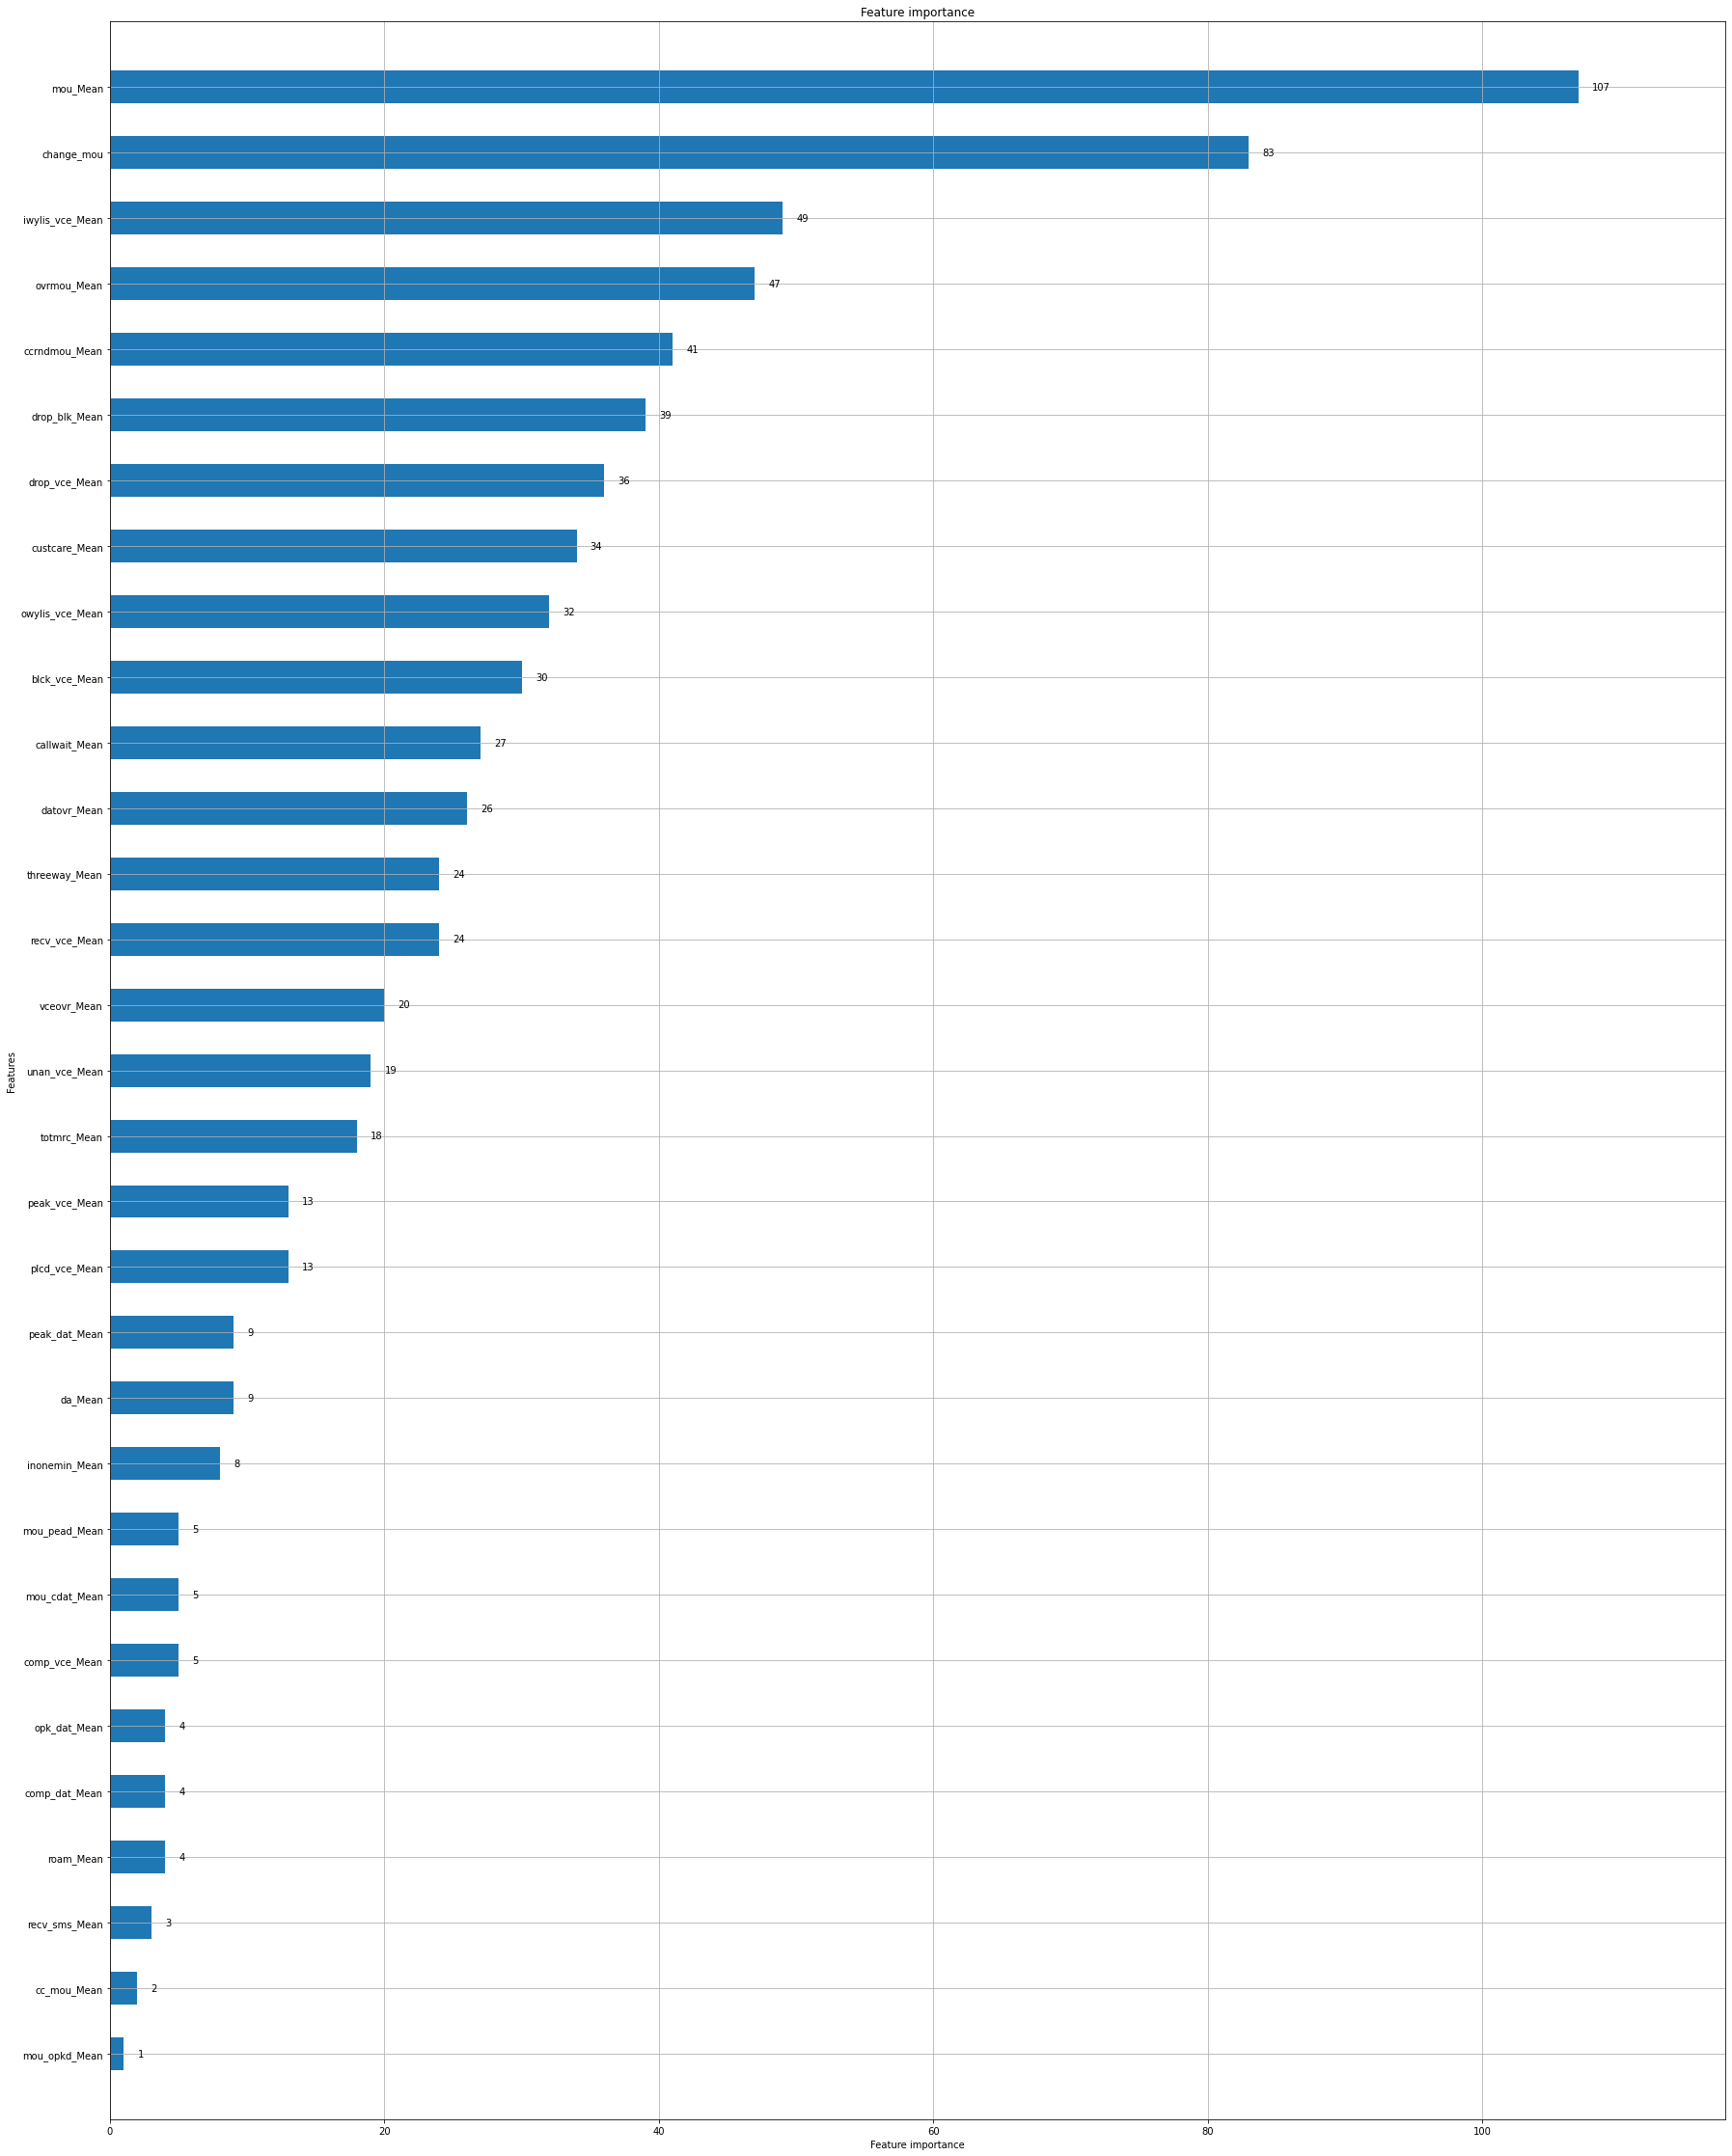

In [274]:
lgb.plot_importance(model, height=0.5, figsize=(30,40))

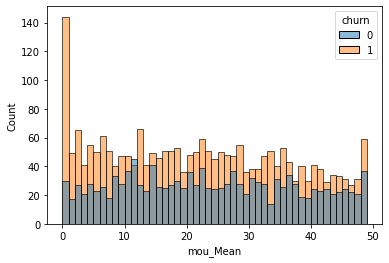

In [275]:
sns.histplot(data=df.loc[df['months']==12], x="mou_Mean",bins=range(0,50,1),hue='churn')

# **月間使用量が減少した顧客に脱退が多い**

In [292]:
record.loc[(record['months']==12)&(record['churn']==1),'rev_Mean'].mode()

0    29.99
dtype: float64

In [293]:
record.loc[(record['months']==12)&(record['churn']==0),'rev_Mean'].mode()

0    29.99
dtype: float64

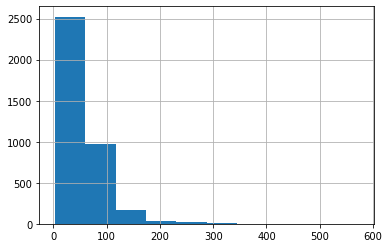

In [294]:
record.loc[(record['months']==12)&(record['churn']==1),'rev_Mean'].hist()

In [279]:
#df.loc[(df['months']==12)&(df['churn']==1),'avg6mou'].hist(bins=50)

In [ ]:
#df.loc[(df['months']==12)&(df['churn']==0),'avg3mou'].hist(bins=50)

In [ ]:
#df.loc[(df['months']==12)&(df['churn']==0),'avg6mou'].hist(bins=50)

In [280]:
#df['dec']=df['avg6mou']-df['avg3mou']
#sns.histplot(data=df.loc[df['months']==12], bins=range(-50,50,1), x="dec",hue='churn')

Mean monthly revenue (charge amount)

In [295]:
record.loc[record['rev_Mean'].notna(),'rev_Mean']

0         23.997500
1         57.492500
2         16.990000
3         38.000000
4         55.230000
            ...    
99984     85.150000
99985     71.993333
99986    117.490000
99990     29.990000
99993     95.170000
Name: rev_Mean, Length: 99643, dtype: float64

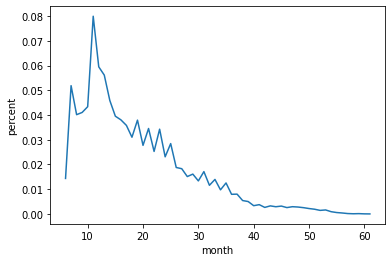

In [296]:
ser = record.loc[record['rev_Mean'].notna()].groupby('months')['rev_Mean'].sum()/record.loc[record['rev_Mean'].notna(),'rev_Mean'].sum()
dfp = pd.DataFrame({'month':ser.keys(), 'percent':ser})
sns.lineplot(x='month', y='percent',data=dfp)

# 顧客の累計支払額のシェアBilling adjusted total revenue over the life of the customer

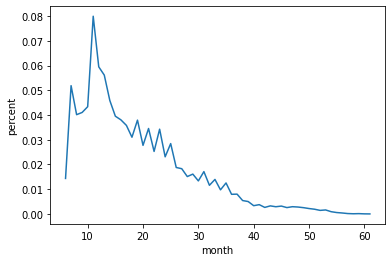

In [297]:
ser = record.groupby('months')['rev_Mean'].sum()/record['rev_Mean'].sum()
dfp = pd.DataFrame({'month':ser.keys(), 'percent':ser})
sns.lineplot(x='month', y='percent',data=dfp)

Average monthly number of calls over the life of the customer

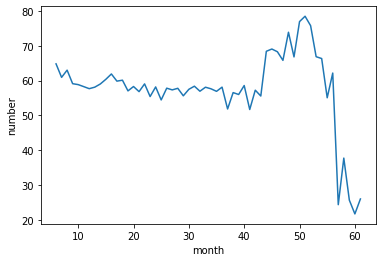

In [301]:
ser = record.groupby('months')['rev_Mean'].mean()
dfp = pd.DataFrame({'month':ser.keys(), 'number':ser})
sns.lineplot(x='month', y='number',data=dfp)

Average monthly revenue over the life of the customer

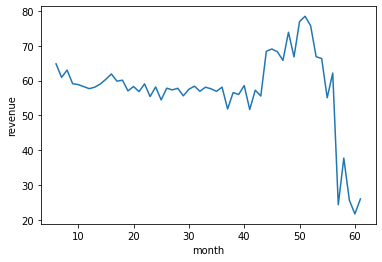

In [302]:
ser = record.groupby('months')['rev_Mean'].mean()
dfp = pd.DataFrame({'month':ser.keys(), 'revenue':ser})
sns.lineplot(x='month', y='revenue',data=dfp)

顧客数のシェア

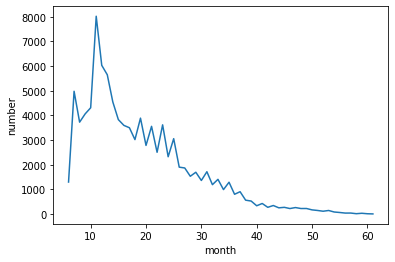

In [303]:
ser = record.groupby('months')['rev_Mean'].count()
dfp = pd.DataFrame({'month':ser.keys(), 'number':ser})
sns.lineplot(x='month', y='number',data=dfp)

In [304]:
record.loc[record['rev_Mean']-record['ovrrev_Mean']-record['totmrc_Mean']<0]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
4,55.2300,570.500000,71.980,0.0000,0.0,0.000,0.000,0.000,0.00,38.500000,...,0.000000,218.086667,0.000000,10.333333,222.333333,137.000000,0.0,0.000000,0,57
7,38.0525,682.500000,52.490,0.2475,0.0,0.000,0.000,0.000,0.00,147.500000,...,0.000000,431.153333,0.000000,10.666667,97.000000,73.333333,0.0,0.666667,0,53
10,62.1275,97.500000,65.985,2.4750,0.0,0.000,0.000,0.000,0.00,23.500000,...,0.000000,70.420000,0.000000,0.333333,19.666667,15.333333,0.0,0.000000,0,59
19,50.9650,162.000000,69.990,0.0000,2.5,0.975,0.000,0.975,0.00,-58.000000,...,1.333333,66.353333,2.373333,2.000000,62.000000,51.333333,0.0,0.000000,0,56
28,98.4225,608.000000,94.990,1.2375,41.5,12.195,7.125,5.070,0.00,-563.000000,...,0.000000,151.060000,0.000000,9.000000,284.666667,206.000000,0.0,4.666667,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,0.0000,76.000000,29.670,0.0000,0.0,0.000,0.000,0.000,0.00,0.000000,...,0.000000,35.530000,0.000000,6.666667,62.333333,43.000000,0.0,0.000000,0,30
99981,34.9900,6.333333,44.990,0.0000,0.0,0.000,0.000,0.000,0.00,-6.333333,...,0.000000,8.256667,0.000000,1.333333,13.666667,11.666667,0.0,0.000000,1,30
99984,85.1500,815.000000,87.990,0.0000,1.0,0.390,0.000,0.390,0.39,0.000000,...,0.000000,189.606667,0.000000,12.000000,83.333333,60.000000,0.0,0.000000,1,27
99986,117.4900,384.000000,29.990,0.0000,250.0,87.500,87.500,0.000,0.00,0.000000,...,0.000000,32.786667,0.000000,5.000000,169.333333,138.000000,0.0,0.000000,1,30


org.loc[org['rev_Mean']-org['ovrrev_Mean']-org['totmrc_Mean']>0] 42362

org.loc[org['rev_Mean']-org['ovrrev_Mean']-org['totmrc_Mean']<0 50198
